In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#File path
file_path=r"C:\Users\castl\Desktop\Internship stuff\Data_Lionel\Data_Lionel\SMC_data\HEPData-ins471981-v1-csv\Table6.csv"

In [14]:
# Read the CSV file
with open(file_path, 'r') as file:
    lines = file.readlines()

In [15]:
#Find the line where the column headers start (the line with X,X LOW,X HIGH,...)
header_line_index = None
for i, line in enumerate(lines):
    if line.strip().startswith('X,X LOW,X HIGH'):
        header_line_index = i
        break

if header_line_index is None:
    raise ValueError("Could not find the data header line in the CSV file")

In [16]:
# Read the data starting from the header line
df = pd.read_csv(file_path, skiprows=header_line_index)

In [17]:
# Clean column names (remove any extra spaces)
df.columns = df.columns.str.strip()

In [18]:
#Calculate X as midpoint of X_LOW and X_HIGH
X_mid=(df['X LOW']+df['X HIGH'])/2

In [19]:
#Extract G1 values and statistical errors
g1_values = df['G1']
stat_errors = df['stat +']  # Using positive stat error (they're symmetric)

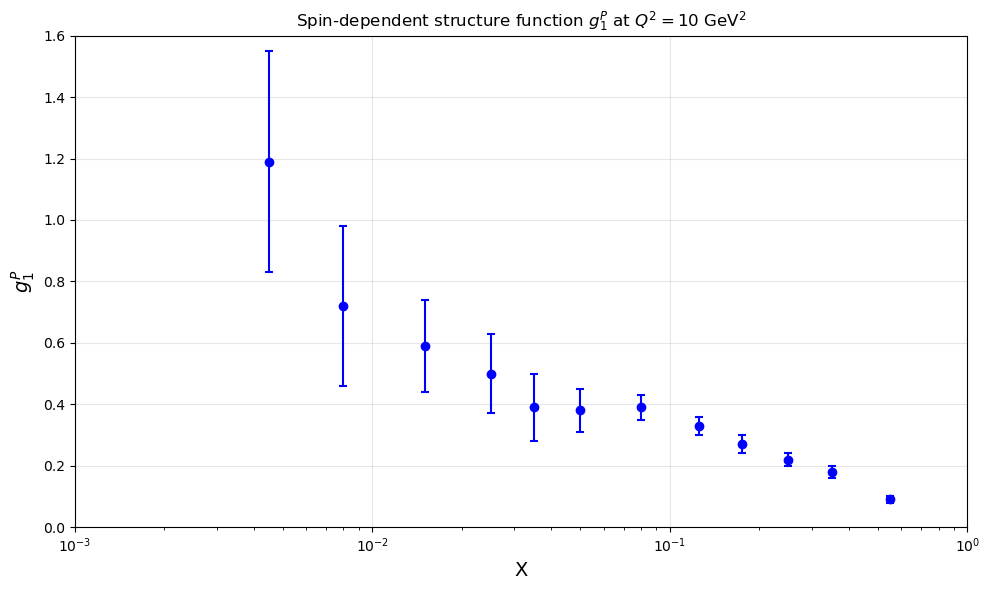


Data Summary:
X range: 0.005 to 0.550
G1 range: 0.090 to 1.190
Number of data points: 12

Full dataset:
        X  X LOW  X HIGH    G1  stat +  stat -  sys_1 +  sys_1 -  sys_2 +  \
0   0.005  0.003   0.006  1.19    0.36   -0.36     0.07    -0.07     0.56   
1   0.008  0.006   0.010  0.72    0.26   -0.26     0.05    -0.05     0.25   
2   0.014  0.010   0.020  0.59    0.15   -0.15     0.03    -0.03     0.07   
3   0.025  0.020   0.030  0.50    0.13   -0.13     0.03    -0.03     0.02   
4   0.035  0.030   0.040  0.39    0.11   -0.11     0.02    -0.02     0.01   
5   0.049  0.040   0.060  0.38    0.07   -0.07     0.02    -0.02     0.00   
6   0.077  0.060   0.100  0.39    0.04   -0.04     0.02    -0.02     0.00   
7   0.122  0.100   0.150  0.33    0.03   -0.03     0.02    -0.02     0.00   
8   0.173  0.150   0.200  0.27    0.03   -0.03     0.01    -0.01     0.00   
9   0.242  0.200   0.300  0.22    0.02   -0.02     0.01    -0.01     0.01   
10  0.342  0.300   0.400  0.18    0.02   -0.02  

In [20]:
#Plotting and Summary
# Create the plot
plt.figure(figsize=(10, 6))

# Plot with error bars
plt.errorbar(X_mid, g1_values, yerr=stat_errors, 
             fmt='o', color='blue', capsize=3, capthick=1.5, 
             markersize=6, linewidth=1.5, markerfacecolor='blue')

# Formatting to match reference plots with log scale
plt.xlabel('X', fontsize=14)
plt.ylabel('$g_1^P$', fontsize=14)
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.xlim(0.001, 1)
plt.ylim(0, 1.6)

# Add title with measurement info
plt.title('Spin-dependent structure function $g_1^P$ at $Q^2 = 10$ GeV$^2$', fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print some statistics
print("\nData Summary:")
print(f"X range: {X_mid.min():.3f} to {X_mid.max():.3f}")
print(f"G1 range: {g1_values.min():.3f} to {g1_values.max():.3f}")
print(f"Number of data points: {len(df)}")

# Print the full dataset for verification
print("\nFull dataset:")
print(df)